# Analyzing the dataset 'I-94 Interstate highway'

I hope you are all well and that you are looking forward to the upcoming analysis. Please don't be too hard on me as this is my first data analysis project with pyhton, pandas, matplotlib, etc... So, let's get started!


We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway. You can download it from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd
interstate = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
print('Additional infos:\n', interstate.info())
print('First five rows:\n', interstate.head())
print('Last five rows:\n', interstate.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
Additional infos:
 None
First five rows:
   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          9

After we read in the dataset and set our analyses goal, I would like to mention some facts about the dataset:

- the dataframe has 9 columns
- the dataframe has 48204 values and not any null values

the columns are: 
- holiday: is it a holiday - yes or no?
- temp: numeric temperature (in kelvin)
- rain_1h: numeric amount of rain that occured in the hour (in mm)
- snow_1h: numeric amount of snow that occured in the hour (in mm)
- clouds_all: numeric percentage of cloud cover
- weather_main: short description of the current weather (categorical)
- weather_description: longer description of the current weather (categorical)
- date_time: Date Time Hour of the data collected (in CST time)
- traffic_volume: numeric hourly reported traffic volume from west to east

# Analysis

## Traffic Volume

Next, we're going to plot a histogram to visualize the ditribution of the traffic_volume column.
To do this we need to import Matplotlib. And to use Matplotlib inside the Jupyter notebook, we also need to add the %matplotlib inline magic - this enables Jupyter to generrate the graphs.

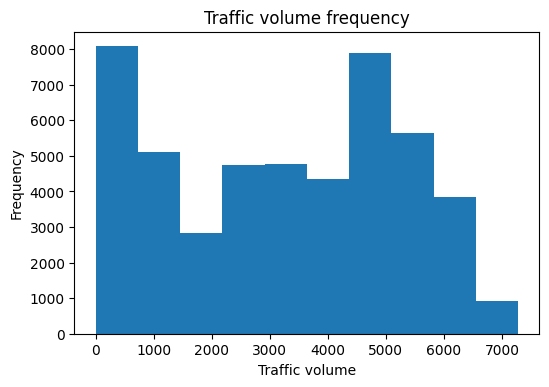

Additional statistics about traffic_volume:
 count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [2]:
import matplotlib.pyplot as plt

#if using a Jupyter notebook, includue:
%matplotlib inline


#Plotting a histogram of traffic_volume
interstate['traffic_volume'].plot.hist(bins = 10)
plt.title('Traffic volume frequency')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.show()

#Getting some information about the column traffic_volume
print('Additional statistics about traffic_volume:\n',interstate['traffic_volume'].describe())

First of all: I don't know why, but I can't add a title and the axies designation. Maybe I can fix it later..
--> I fixed it! Restarting the notebook works wonder!

Back to the analysis: From the histogram and statistics, we can observe that the most frequent traffic volumes are either lower than 1000 cars or around 5000 cars per hour. As this data does not follow a normal distribution -it's not even centered around the mean. The mean value (3259.818355) does not represent well the data.


- About 25% of the time, there werd 1,1932 cars or fewer passing the station each hour. This probably occurs during the night, or when the road is under construtiction.

- About 25% of the time, the traffic volume was four times as much (4,933 cars or more)

It's possible that nighttime and daytime might influence the traffic volume. So we should compare the daytime and the nighttime data.

## Traffic volume x daytime/nighttime

As I said before, we need to analyse the daytime and nighttime data each. Due to that, we'll divide the dataset into two parts:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours form 7 p.m. to 7 a.m. (12 hours)

It's not perfect for distinguishing between day and night, but it will do for now to get started.

In [3]:
#transforming the date_time column to datetime
interstate['date_time'] = pd.to_datetime(interstate['date_time'])

#isolating daytime from nighttime
daytime_data = interstate[(interstate['date_time'].dt.hour >= 7 ) & (interstate['date_time'].dt.hour < 19)]
nighttime_data = interstate[(interstate['date_time'].dt.hour < 7) | (interstate['date_time'].dt.hour >= 19)]

Now we're going to compare the daytime data from the nighttime data with plotting the histograms of the traffic_volume.

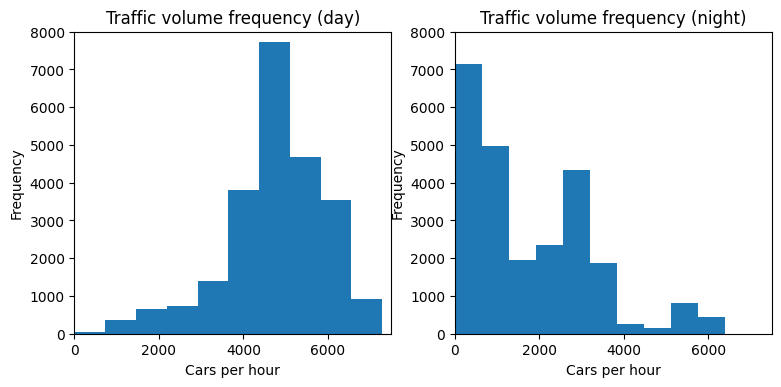

Daytime Data:
 count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Nighttime Data:
 count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


In [4]:
plt.figure(figsize=(9,4))

#Plotting a histogram of the daytime traffic_volume
plt.subplot(1, 2, 1)
daytime_data['traffic_volume'].plot.hist(bins = 10)
plt.xlim(0,7500)
plt.ylim(0,8000)
plt.title('Traffic volume frequency (day)')
plt.xlabel('Cars per hour')
plt.ylabel('Frequency')

#Plotting a histogram of the nighttime traffic_volume
plt.subplot(1, 2, 2)
nighttime_data['traffic_volume'].plot.hist(bins = 10)
plt.xlim(0,7500)
plt.ylim(0,8000)
plt.title('Traffic volume frequency (night)')
plt.xlabel('Cars per hour')
plt.ylabel('Frequency')
plt.show()

#Additional statistics
print('Daytime Data:\n', daytime_data['traffic_volume'].describe())
print('\nNighttime Data:\n', nighttime_data['traffic_volume'].describe())

Through the diagrams and statistics, it is easy to see that the traffic volume during the day is very different from the traffic volume during the night.

As can be seen nicely, the traffic volume during the day follows a normal distribution. The traffic volume at night resembles a negative exponential development - higher frequency at lower values, decreasing with increasing values.

Since our goal is to find indicators for the heavy traffic volume and the traffic volume at night is very low, we now continue to work only with the daytime data.

## Traffic volume x time

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day. We're going to look at a few line plots shwoing how the traffic volume changed according to the following parameters:
- Month
- Day of the week
- Time of the day

## Traffic volume x month

<ipython-input-5-bad198fc4b2c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



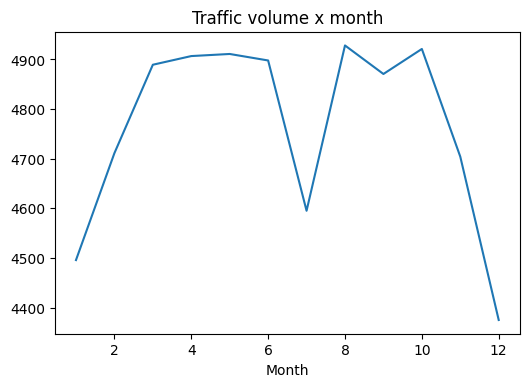

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64


In [5]:
#Create a new column where each value describes the month when the traffic volume measurement was taken
daytime_data['month'] = daytime_data['date_time'].dt.month

#To group the dataset by the month column with the mean as an aggregate function
by_month = daytime_data.groupby('month').mean()
by_month['traffic_volume']

#line plot on traffic_volume x month data
plt.plot(by_month['traffic_volume'])
plt.title('Traffic volume x month')
plt.xlabel('Month')
plt.show()

print(by_month['traffic_volume'])

The table and line graph show that traffic volumes are high and fairly evenly distributed in March-June and August-October, while the lowest values occur in January, July, and December. It is likely that these months are the vacation periods.

## Traffic volume x day 

<ipython-input-6-9a9915cd289d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



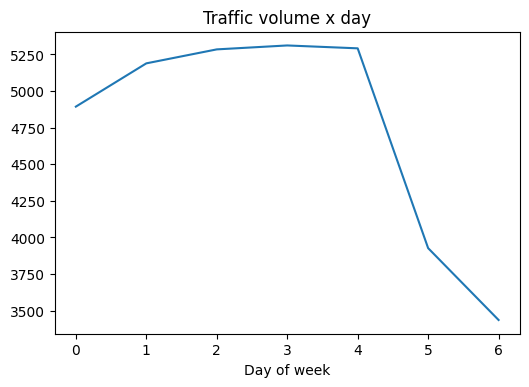

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64


In [6]:
#Create a new column where each value describes the day when the traffic volume measurement was taken
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek

#To group the dataset by the day column with the mean as an aggregate function
by_dayofweek = daytime_data.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

#line plot on traffic_volume x day data
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Traffic volume x day')
plt.xlabel('Day of week')
plt.show()

print(by_dayofweek['traffic_volume'])

-> 0 is Monday, 6 is sunday.
From Mondays to Fridays, traffic is much higher than on Saturdays and Sundays. On Thursday it peaks overall, with traffic not significantly higher than on the other days of the week.
During the week it is probably higher than on weekends because of the influence of commuting to work by car.

## Traffic volume x time of the day

Previously we found that the traffic volume is significantlyheavier on business days compared to the weekends.
We'll now generate a line plot for the time of the day. The weekends will drag down the average values, so we're going to look at the averages separately. To to that, we'll start by splitting the data based on the day tipe: business day or weekend.

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-7-de0dad05650a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



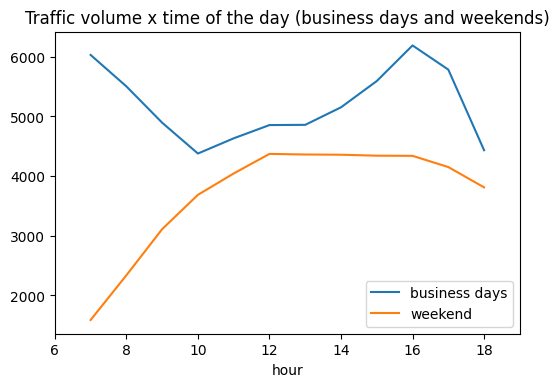

In [7]:
#splitting the dataset on business day and weekend:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
business_days = daytime_data.copy()[daytime_data['dayofweek']<=4] # 4 == Friday
weekend = daytime_data.copy()[daytime_data['dayofweek']>=5] # 5 == Saturday

#To group the dataset by the business_days and weekend column with the mean as an aggregate function
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

#line plot on traffic_volume x time of the day (business_days)
plt.plot(by_hour_business['traffic_volume'], label= 'business days')

#line plot on traffic_volume x time of the day (weekend)
plt.plot(by_hour_weekend['traffic_volume'], label= 'weekend')

#for both:
plt.title('Traffic volume x time of the day (business days and weekends)')
plt.xlim(6,19)
plt.xlabel('hour')
plt.legend()
plt.show()

It is easy to see that on weekdays the peak hours are around 7 AM and around 4 PM.
On weekends, the distribution resembles a logarithmic distribution, where the later hours have higher values.
This effect is probably caused by the use of the car (commuting to work on business days, leisure on weekends).

# Correlations of traffic volume with weather

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusion:
- The traffic is usually heavier during warm month (March - October) compared to cold months (November - February)
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these coluns are numerical so let's start by looking up their correlation values with traffic_volume.
We'll will still continue with the daytime_data but don't distinguish between business days and weekends.

In [8]:
#To check which columns are numerical:
print(daytime_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
 10  dayofweek            23877 non-null  int64         
 11  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 2.4+ MB
None


As we can see in the information above, the weather columns temp, rain_1, snow_1h, clouds_all have numerical values.
Here again for general understanding what is behind the data:

- temp: numeric temperature (in kelvin)
- rain_1h: numeric amount of rain that occured in the hour (in mm)
- snow_1h: numeric amount of snow that occured in the hour (in mm)
- clouds_all: numeric percentage of cloud cover

Next we'll check the correlation of the traffic with these columns.

In [9]:
#Correlation between weather data and traffic
corr_traffic_temp = daytime_data['traffic_volume'].corr(daytime_data['temp'])
corr_traffic_rain = daytime_data['traffic_volume'].corr(daytime_data['rain_1h'])
corr_traffic_snow = daytime_data['traffic_volume'].corr(daytime_data['snow_1h'])
corr_traffic_clouds = daytime_data['traffic_volume'].corr(daytime_data['clouds_all'])

print('The correlation of traffic volume with temperature is:', round(corr_traffic_temp, 2))
print('The correlation of traffic volume with rain is:', round(corr_traffic_rain, 2))
print('The correlation of traffic volume with snow is:', round(corr_traffic_snow, 2))
print('The correlation of traffic volume with clouds is:', round(corr_traffic_clouds, 2))

The correlation of traffic volume with temperature is: 0.13
The correlation of traffic volume with rain is: 0.0
The correlation of traffic volume with snow is: 0.0
The correlation of traffic volume with clouds is: -0.03


It's very rare to find correlations of plain 0 - such as traffic volume with rain and snow. Therefore, we'll inspect these distributions in scatterplots to see what's happening:

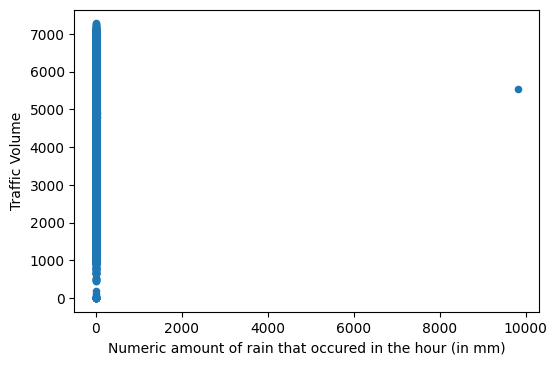

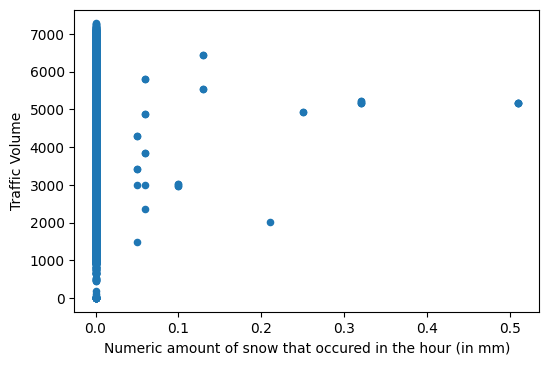

In [10]:
#Scatter plot for rain variables:
daytime_data.plot.scatter(x='rain_1h', y='traffic_volume')
plt.xlabel('Numeric amount of rain that occured in the hour (in mm)')
plt.ylabel('Traffic Volume')
plt.show()

#Scatter plot for snow variables:
daytime_data.plot.scatter(x='snow_1h', y='traffic_volume')
plt.xlabel('Numeric amount of snow that occured in the hour (in mm)')
plt.ylabel('Traffic Volume')
plt.show()

In the graph on rain, you can clearly see an outlier that distorts the visual representation. We adjust the graph for this outlier.

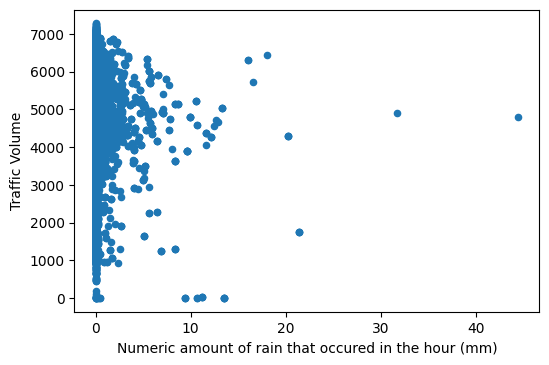

The correlation of traffic volume with temperature is: 0.13
The correlation of traffic volume with rain is: -0.04
The correlation of traffic volume with snow is: 0.0
The correlation of traffic volume with clouds is: -0.03


In [11]:
#Correcting data regarding outliers in rain data
daytime_data = daytime_data[daytime_data['rain_1h'] < 50]

#Scatter plot for rain variables
daytime_data.plot.scatter(x='rain_1h', y='traffic_volume')
plt.xlabel('Numeric amount of rain that occured in the hour (mm)')
plt.ylabel('Traffic Volume')
plt.show()

#Correcting the correlation
corr_traffic_rain = daytime_data['traffic_volume'].corr(daytime_data['rain_1h'])

print('The correlation of traffic volume with temperature is:', round(corr_traffic_temp, 2))
print('The correlation of traffic volume with rain is:', round(corr_traffic_rain, 2))
print('The correlation of traffic volume with snow is:', round(corr_traffic_snow, 2))
print('The correlation of traffic volume with clouds is:', round(corr_traffic_clouds, 2))

It seems that the weather variable with the highest correlation with traffic volume is temperature: the higher the temperature, the higher the traffic (although it's a very weak relation - r = 0.13). We'll proceed now to check the scatterplot of these two variables:

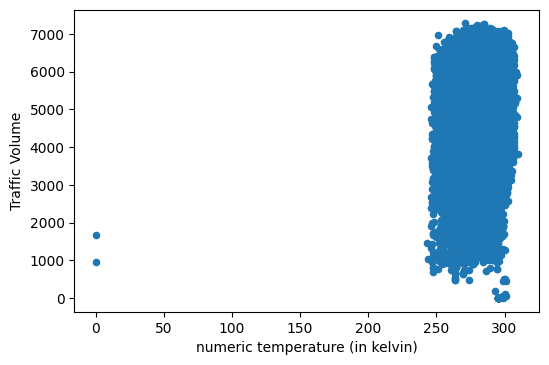

In [12]:
#Scatter plot for temperature x traffic volume
daytime_data.plot.scatter(x='temp', y='traffic_volume')
plt.xlabel('numeric temperature (in kelvin)')
plt.ylabel('Traffic Volume')
plt.show()

In the graph on temperature, you can clearly see an outlier that distorts the visual representation. We adjust the graph for this outlier.

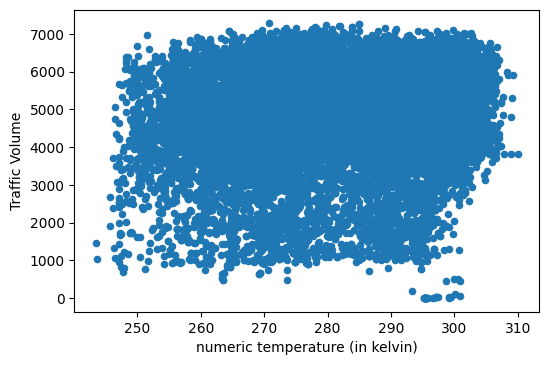

The correlation of traffic volume with temperature is: 0.13
The correlation of traffic volume with rain is: -0.04
The correlation of traffic volume with snow is: 0.0
The correlation of traffic volume with clouds is: -0.03


In [13]:
#Correcting the data regarding the outlier in temp data
daytime_data = daytime_data[daytime_data['temp'] > 200]

#Scatter plot for temperature x traffic volume
daytime_data.plot.scatter(x='temp', y='traffic_volume')
plt.xlabel('numeric temperature (in kelvin)')
plt.ylabel('Traffic Volume')
plt.show()

#Correcting the correlation
corr_traffic_temp = daytime_data['traffic_volume'].corr(daytime_data['temp'])

print('The correlation of traffic volume with temperature is:', round(corr_traffic_temp, 2))
print('The correlation of traffic volume with rain is:', round(corr_traffic_rain, 2))
print('The correlation of traffic volume with snow is:', round(corr_traffic_snow, 2))
print('The correlation of traffic volume with clouds is:', round(corr_traffic_clouds, 2))

The weather variable that correlates most strongly with traffic volume is temperature: the higher the temperature, the higher the traffic volume (although it is a very weak correlation - r = 0.13). Thus, we do not need to consider it as a reliable indicator of high traffic volume.


Next we'll look at the weather-related columns to see if we have more useful data to find out if there are some other indicators for heavy traffic on the I-94 Interstate highway. We'll have a look on the columns 'weather_main' and 'weather_description'.

We're going to calculate the average traffic volume associated with each unique value in these two columns and create some bar plots for the traffic_volume column of by_weather_main and by_weather_description.

To remind you again what is behind "weather_main" and "weather_description", I copied the definition from above:

- weather_main: short description of the current weather (categorical)
- weather_description: longer description of the current weather (categorical)

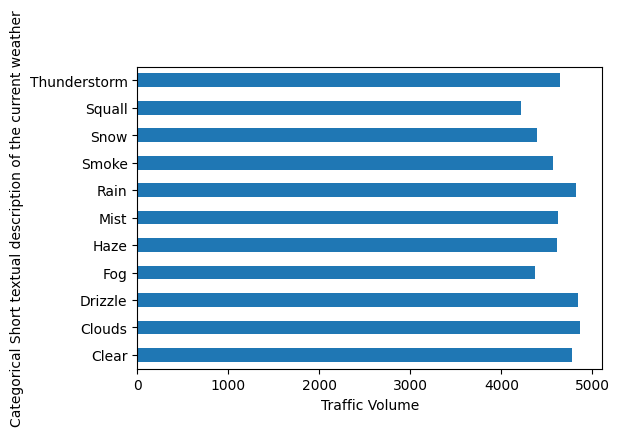

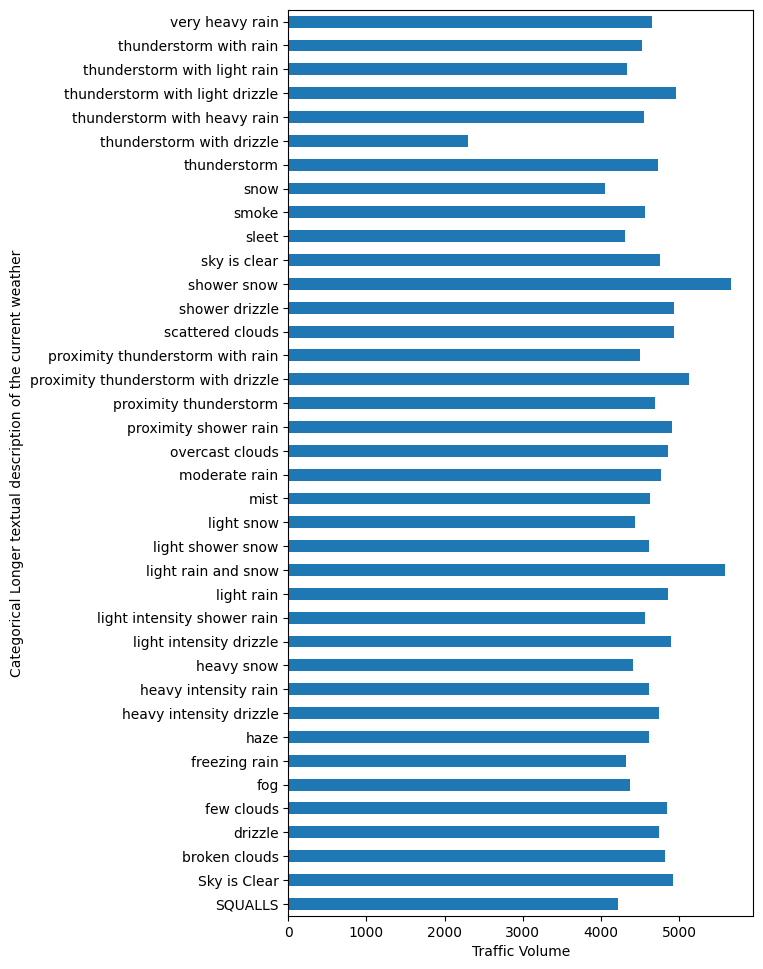

In [14]:
#Grouping and averaging for categorical weather variables
by_weather_main = daytime_data.groupby('weather_main').mean()
by_weather_description = daytime_data.groupby('weather_description').mean()

#Horizontel bar plot of weather_main
by_weather_main['traffic_volume'].plot(kind='barh')
plt.ylabel('Categorical Short textual description of the current weather')
plt.xlabel('Traffic Volume')
plt.show()

#Horizontel bar plot of weather_description
by_weather_description['traffic_volume'].plot(kind='barh', figsize=(6,12))
plt.ylabel('Categorical Longer textual description of the current weather')
plt.xlabel('Traffic Volume')
plt.show()

The second graph shows that 'shower snow' and 'light rain and snow' exceed 5000 cars, being the registered weathers with the highests traffic volumes.

But as you can see in both charts, that's not a strong indicator of heavy traffic.

And that's it. There are many more ways to analyze this dataset, but for now I'm done with this dataset and my task from dataquest. I hope you guys enjoyed reading my very first attempt at analyzing data with Python. If you have any tips and tricks or just want to tell me something, please don't hesitate to contact me :)

As a last step, I would like to draw a short conclusion.

# Conclusion

The goal of our analysis was to determine a few indicators of heavy traffic on I-94. These indicators could be weather type, time of the day, time of the week, etc.
From the analysis we have conducted, we can conclude that traffic volume on this road is affected by:

- Month of the year: The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- Day of week: The traffic is usually heavier on business days compared to weekends.
- Hour of the day: On business days, the rush hours are around 7 and 16.
- Weather: Shower snow and light rain with snow make traffic volume increase over 5000 cars. But all in all, weather there is not a strong indicator of heavy traffic.